In [1]:
import pandas as pd
# pandas is used to import , export and work with a dataframe 

import numpy as np
# numpy is used to do some mathematical algorithms 

import matplotlib.pyplot as plt
# Matplotlib is a comprehensive library for creating static, animated, and interactive 


import seaborn as sns
# seaborn is data visualization library based on matplotlib

# inserting a data

In [ ]:
Bitcoin=pd.read_csv("C:/Users/Ajesh/Documents/IBM Python Doc/Bitcoin.csv")

In [ ]:
Bitcoin.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1417412280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1417412340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1417412400,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,1417412460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1417412520,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Converting Timestamp to date and time

In [ ]:
# datetime is a library in python to work with date and time

from datetime import datetime
Bitcoin["Timestamp"] = [datetime.fromtimestamp(x) for x in Bitcoin["Timestamp"]]

In [ ]:
Bitcoin.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 11:03:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 11:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01 11:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01 11:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01 11:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-12-01 11:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-12-01 11:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-12-01 11:10:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,2014-12-01 11:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-12-01 11:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Detecting outliers

In [ ]:
def detect_outliers(data):
    outlier=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [ ]:
#Finding a outliers and inserting in a object


a=detect_outliers(Bitcoin["Open"])
b=detect_outliers(Bitcoin["High"])
c=detect_outliers(Bitcoin["Low"])
d=detect_outliers(Bitcoin["Close"])
g=detect_outliers(Bitcoin["Weighted_Price"])

# e and f are detected by boxplot.
e=Bitcoin[Bitcoin["Volume_(BTC)"]>8]
f=Bitcoin[Bitcoin["Volume_(Currency)"]>4000]

In [ ]:
e=e["Volume_(BTC)"]
f=f["Volume_(Currency)"]

### converting outliers into null value

In [ ]:
Bitcoin["Open"] = Bitcoin["Open"].replace([a],np.nan)
Bitcoin["High"] = Bitcoin["High"].replace([b],np.nan)
Bitcoin["Low"] = Bitcoin["Low"].replace([c],np.nan)
Bitcoin["Close"] = Bitcoin["Close"].replace([d],np.nan)
Bitcoin["Volume_(BTC)"] = Bitcoin["Volume_(BTC)"].replace([e],np.nan)
Bitcoin["Volume_(Currency)"] = Bitcoin["Volume_(Currency)"].replace([f],np.nan)
Bitcoin["Weighted_Price"] = Bitcoin["Weighted_Price"].replace([g],np.nan)

In [ ]:
Bitcoin.isnull().sum()

Timestamp                  0
Open                  143798
High                  143860
Low                   143687
Close                 143812
Volume_(BTC)          586016
Volume_(Currency)    1081783
Weighted_Price        143785
dtype: int64

### treating a missing values

In [ ]:
Bitcoin["Open"].fillna(np.mean(Bitcoin["Open"]), inplace = True)
Bitcoin["High"].fillna(np.mean(Bitcoin["High"]), inplace = True)
Bitcoin["Low"].fillna(np.mean(Bitcoin["Low"]), inplace = True)
Bitcoin["Close"].fillna(np.mean(Bitcoin["Close"]), inplace = True)
Bitcoin["Volume_(BTC)"].fillna(np.mean(Bitcoin["Volume_(BTC)"]), inplace = True)
Bitcoin["Volume_(Currency)"].fillna(np.mean(Bitcoin["Volume_(Currency)"]), inplace = True)
Bitcoin["Weighted_Price"].fillna(np.mean(Bitcoin["Weighted_Price"]), inplace = True)

In [ ]:
Bitcoin.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
abc=scaling.fit_transform(Bitcoin[["Volume_(Currency)"]])
abc2=scaling.fit_transform(Bitcoin[["Volume_(BTC)"]])

In [ ]:
abc=pd.DataFrame(abc)
abc2=pd.DataFrame(abc2)

In [ ]:
print(abc.head(10))
print()
print(abc2.head(10))

              0
0 -1.445082e+00
1  9.242773e-16
2  9.242773e-16
3  9.242773e-16
4  9.242773e-16
5  9.242773e-16
6  9.242773e-16
7 -1.445082e+00
8  9.242773e-16
9  9.242773e-16

              0
0 -1.311782e+00
1  8.168442e-14
2  8.168442e-14
3  8.168442e-14
4  8.168442e-14
5  8.168442e-14
6  8.168442e-14
7 -1.311782e+00
8  8.168442e-14
9  8.168442e-14


## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
abc=scaling.fit_transform(Bitcoin[["Weighted_Price"]])

In [ ]:
abc=pd.DataFrame(abc)

In [ ]:
abc.head(10)

,0
0,0.020483
1,0.205591
2,0.205591
3,0.205591
4,0.205591
5,0.205591
6,0.205591
7,0.020483
8,0.205591
9,0.205591


## simple graph overview

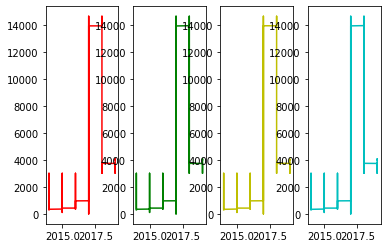

In [ ]:
plt.subplot(1,4,1)
plt.plot(Bitcoin["Timestamp"].dt.year, Bitcoin["Open"], 'r') # More on color options later
plt.subplot(1,4,2)
plt.plot(Bitcoin["Timestamp"].dt.year, Bitcoin["High"], 'g')
plt.subplot(1,4,3)
plt.plot(Bitcoin["Timestamp"].dt.year,Bitcoin["Low"],'y')
plt.subplot(1,4,4)
plt.plot(Bitcoin["Timestamp"].dt.year,Bitcoin["Close"],"c")

plt.show()

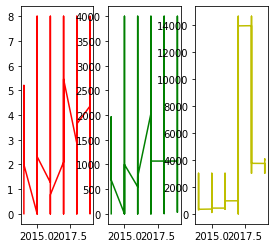

In [ ]:
plt.subplot(1,4,1)
plt.plot(Bitcoin["Timestamp"].dt.year,Bitcoin["Volume_(BTC)"],"r")
plt.subplot(1,4,2)
plt.plot(Bitcoin["Timestamp"].dt.year,Bitcoin["Volume_(Currency)"],"g")
plt.subplot(1,4,3)
plt.plot(Bitcoin["Timestamp"].dt.year,Bitcoin["Weighted_Price"],"y")
plt.show()

## individual graph overview

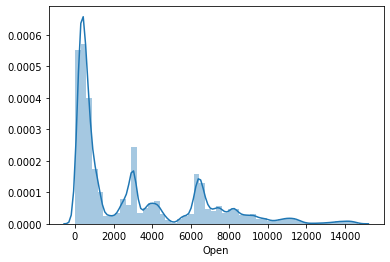

In [ ]:
#open
sns.distplot(Bitcoin['Open']);

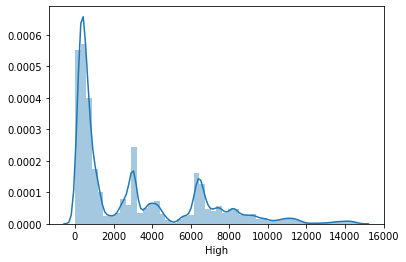

In [ ]:
#High
sns.distplot(Bitcoin['High']);

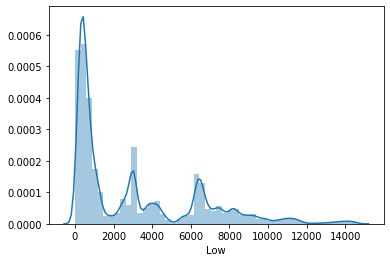

In [ ]:
#Low
sns.distplot(Bitcoin['Low']);

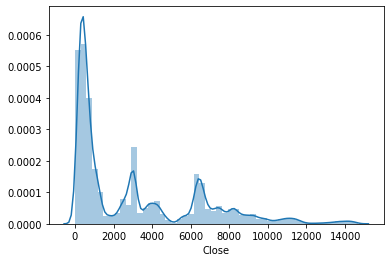

In [ ]:
#Close
sns.distplot(Bitcoin['Close']);

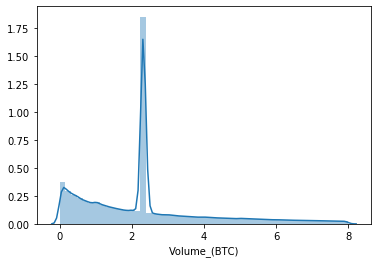

In [ ]:
#Volume_(BTC)
sns.distplot(Bitcoin['Volume_(BTC)']);

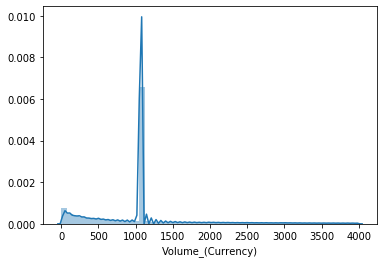

In [ ]:
#Volume_(Currency)
sns.distplot(Bitcoin['Volume_(Currency)']);

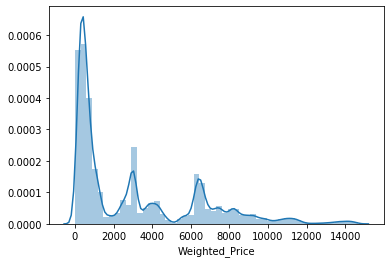

In [ ]:
#Weighted_Price
sns.distplot(Bitcoin['Weighted_Price']);

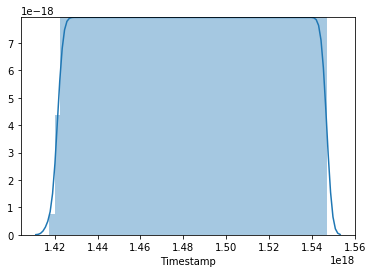

In [ ]:
#number of years
sns.distplot(Bitcoin["Timestamp"]);

### Jointplot overview

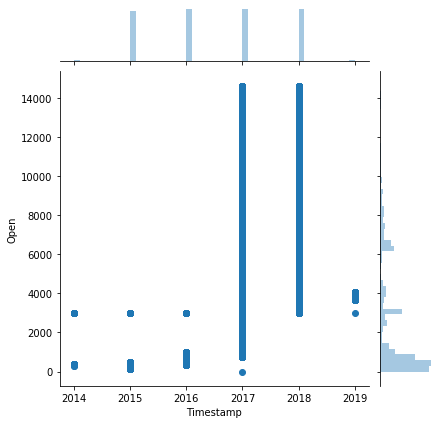

In [ ]:
# x as years and y as open 
sns.jointplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin['Open'],data=Bitcoin);

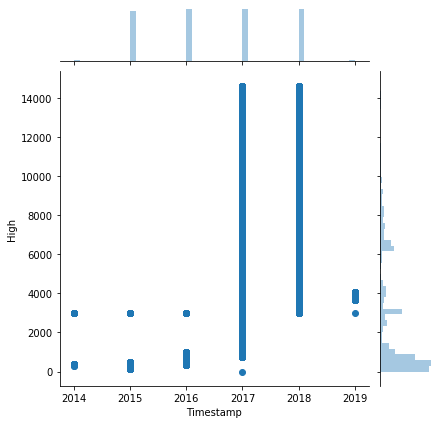

In [ ]:
# x as years and y as High 
sns.jointplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin['High'],data=Bitcoin);

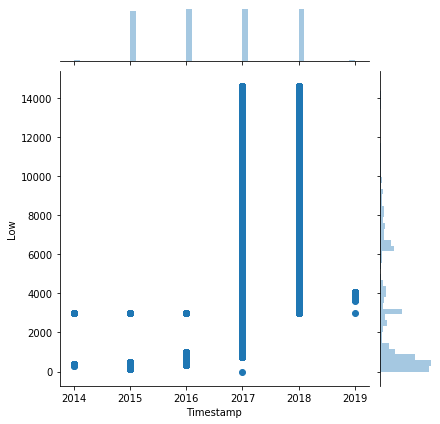

In [ ]:
# x as years and y as Low
sns.jointplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin['Low'],data=Bitcoin);

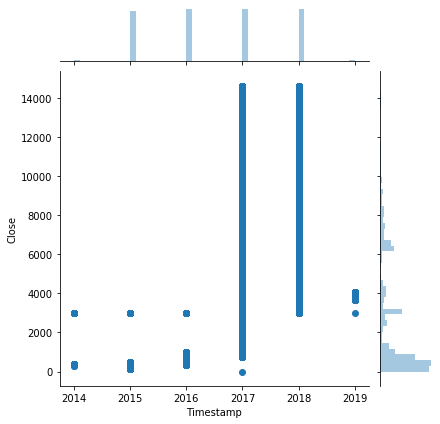

In [ ]:
# x as years and y as Close
sns.jointplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin['Close'],data=Bitcoin);

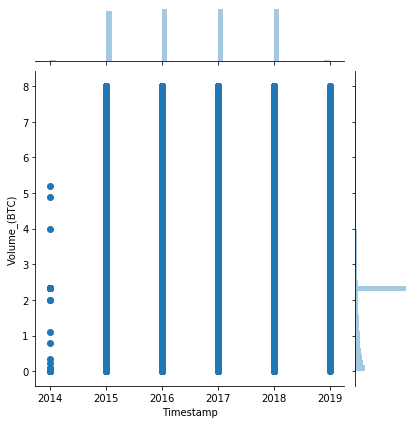

In [ ]:
# x as years and y as Volume_(BTC)
sns.jointplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin['Volume_(BTC)'],data=Bitcoin);

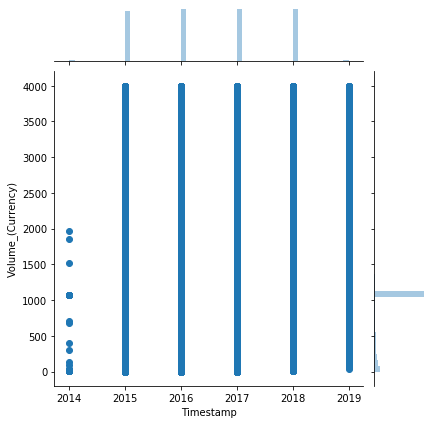

In [ ]:
# x as years and y as Volume_(Currency)
sns.jointplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin['Volume_(Currency)'],data=Bitcoin);

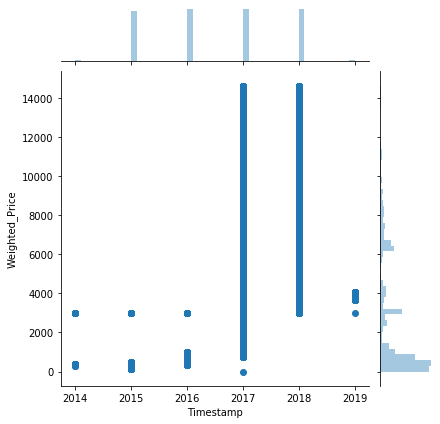

In [ ]:
# x as years and y as Weighted_Price
sns.jointplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin['Weighted_Price'],data=Bitcoin);

### Pairplot view

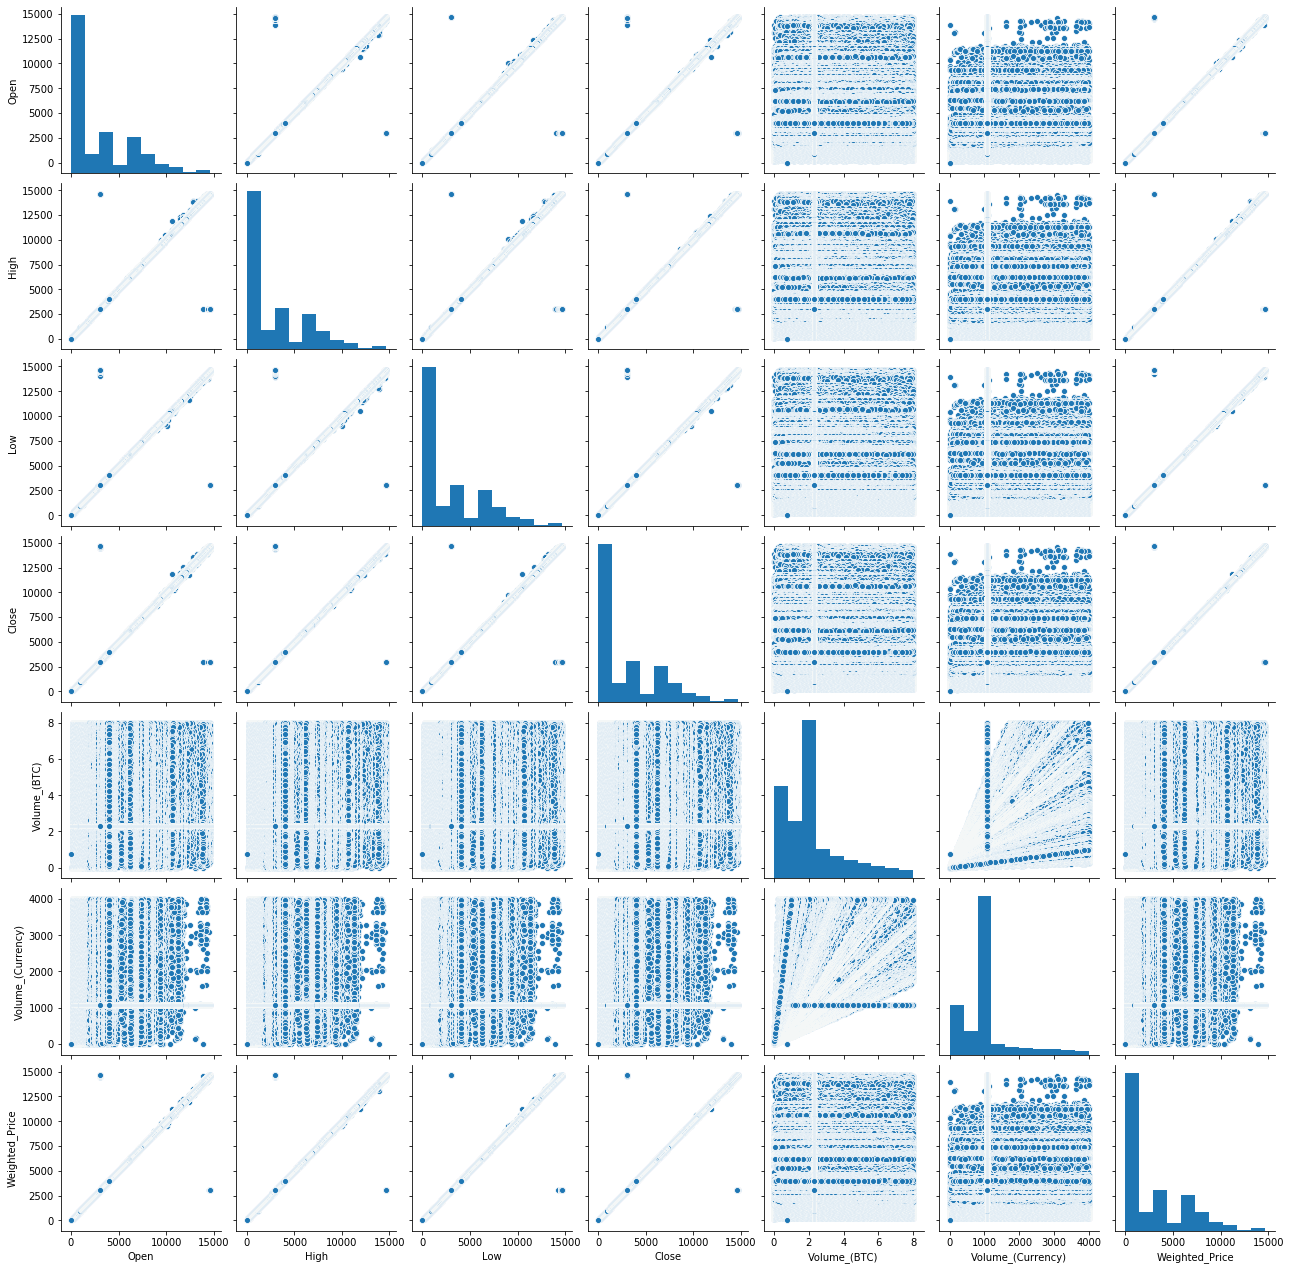

In [ ]:
sns.pairplot(Bitcoin);

### Barplot overview

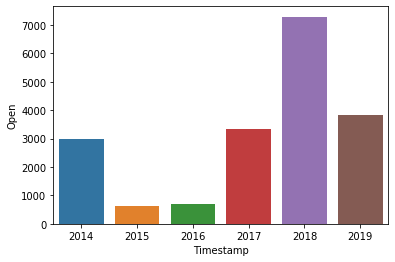

In [ ]:
sns.barplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin["Open"],data=Bitcoin);

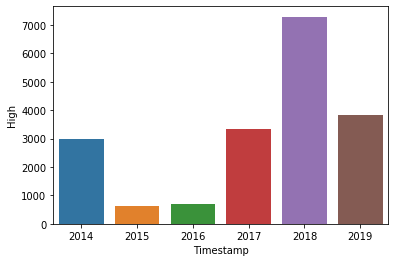

In [ ]:
sns.barplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin["High"],data=Bitcoin);

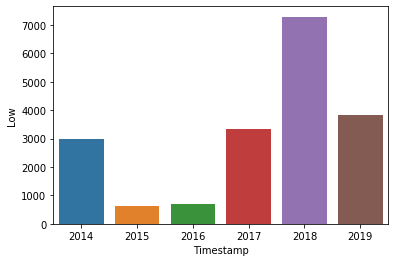

In [ ]:
sns.barplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin["Low"],data=Bitcoin);

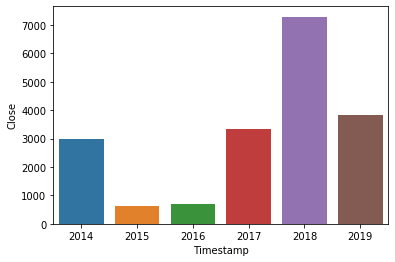

In [ ]:
sns.barplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin["Close"],data=Bitcoin);

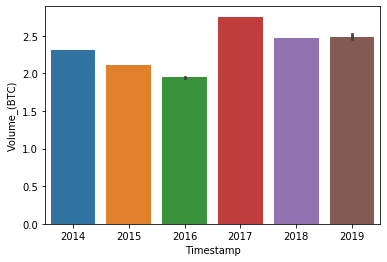

In [ ]:
sns.barplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin["Volume_(BTC)"],data=Bitcoin);

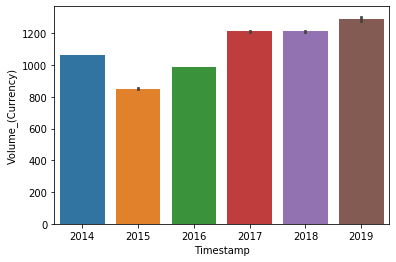

In [ ]:
sns.barplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin["Volume_(Currency)"],data=Bitcoin);

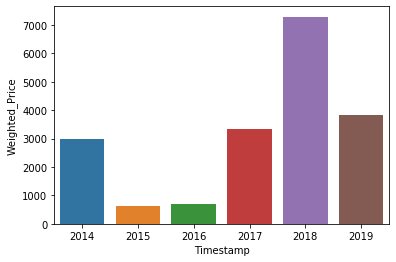

In [ ]:
sns.barplot(x=Bitcoin["Timestamp"].dt.year,y=Bitcoin["Weighted_Price"],data=Bitcoin);

# Machine learning by Multiple Linear Regression

In [ ]:
Bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 11:03:00,300.000000,300.000000,300.000000,300.000000,0.010000,3.000000,300.000000
1,2014-12-01 11:04:00,3010.507571,3011.360517,3009.847149,3010.424403,2.320669,1069.477016,3010.531392
2,2014-12-01 11:05:00,3010.507571,3011.360517,3009.847149,3010.424403,2.320669,1069.477016,3010.531392
3,2014-12-01 11:06:00,3010.507571,3011.360517,3009.847149,3010.424403,2.320669,1069.477016,3010.531392
4,2014-12-01 11:07:00,3010.507571,3011.360517,3009.847149,3010.424403,2.320669,1069.477016,3010.531392


### Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE=LabelEncoder()

In [ ]:
Bitcoin["Timestamp"]=LE.fit_transform(Bitcoin["Timestamp"])

In [ ]:
Bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,0,300.000000,300.000000,300.000000,300.000000,0.010000,3.000000,300.000000
1,1,3010.507571,3011.360517,3009.847149,3010.424403,2.320669,1069.477016,3010.531392
2,2,3010.507571,3011.360517,3009.847149,3010.424403,2.320669,1069.477016,3010.531392
3,3,3010.507571,3011.360517,3009.847149,3010.424403,2.320669,1069.477016,3010.531392
4,4,3010.507571,3011.360517,3009.847149,3010.424403,2.320669,1069.477016,3010.531392


### Splitting the dataset into the Training set and Test set

In [ ]:
x=Bitcoin.iloc[:,[0,1,2,3,4,5,6]]
y=Bitcoin.iloc[:,7]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
x_train.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
557239,557239,372.830000,372.930000,372.830000,372.930000,3.212530,1198.019721
349124,349124,238.050000,238.050000,237.990000,237.990000,0.321000,76.407000
1079799,1079799,922.430000,922.430000,922.430000,922.430000,0.050000,46.121500
395908,395908,247.080000,247.210000,247.080000,247.210000,2.320669,3473.177115
491526,491526,3010.507571,3011.360517,3009.847149,3010.424403,2.320669,1069.477016


### Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
x_train.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
557239,557239,372.830000,372.930000,372.830000,372.930000,3.212530,1198.019721
349124,349124,238.050000,238.050000,237.990000,237.990000,0.321000,76.407000
1079799,1079799,922.430000,922.430000,922.430000,922.430000,0.050000,46.121500
395908,395908,247.080000,247.210000,247.080000,247.210000,2.320669,3473.177115
491526,491526,3010.507571,3011.360517,3009.847149,3010.424403,2.320669,1069.477016


In [ ]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_test

757764      767.941837
1498629    7485.725111
1327900    2730.434133
1618610    8274.968884
542942      384.320372
              ...     
1798512    6745.955878
1452605    5511.303728
337732      228.200000
1040431    1008.704132
1858449    7998.822768
Name: Weighted_Price, Length: 629928, dtype: float64

### Predicting the Test set results

In [ ]:
pred=lm.predict(x_test)
pred

array([ 767.76528018, 7485.31074629, 2730.95115317, ...,  228.15658488,
       1008.43840666, 7996.0312388 ])

In [ ]:
y_test

757764      767.941837
1498629    7485.725111
1327900    2730.434133
1618610    8274.968884
542942      384.320372
              ...     
1798512    6745.955878
1452605    5511.303728
337732      228.200000
1040431    1008.704132
1858449    7998.822768
Name: Weighted_Price, Length: 629928, dtype: float64

### random testing

In [ ]:
lm.predict([[757764,2730.03,2732.50,384.30,5511.31,0.079800,2493.979888]])

array([2727.04144638])

### Checking the Score with Adjusted R2

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,pred)

0.9995652824025147

# completed by 99.95% accuracy ❤ 